# Homogeneous Representations of Spectroscopic Data Cubes 
# Part 2: APPlications
## Astronomy and Computing Journal, 2017
### Mauricio Araya (1), Diego Mardones (2), Marcelo Mendoza (1) and Mauricio Solar (1)

(1) Universidad Técnica Federico Santa María <br>
(2) Universidad de Chile

# 1. Introduction

This notebook contains the code for replicating the experiments presented in the paper "Homogeneous Representations of Spectroscopic Data Cubes". First, you need to download and install the development version of the library `acalib` from github. (part 2)

> git clone acalib

> python setup.py

(The pip version is not useful).

### Imports and Initialization

In [44]:
#matplotlib qt
%matplotlib inline

import sys
sys.path.append('../ACALIB')
import acalib as aca
from astropy.io import fits
import numpy as np
from astropy.table import Table,Column
from astropy.units import u
from astropy import log

### Downloading Data
Our data set is composed by a few spectroscopic cubes from the [ALMA Science Verification Dataset](https://almascience.nrao.edu/alma-data/science-verification). The following code download, uncompress and rename the files for its use.
Please note that this code does not download de data again if it is found (was downloaded for example en part 1)

In [45]:
import os
import urllib.request
import tarfile
from shutil import copyfile

DOWNLOADS_DIR = '../experiments/data/'

# Data from ALMA science verification 

# URLs of the tarballs
urls  = ['https://almascience.nrao.edu/almadata/sciver/OrionKLBand6/OrionKL_Band6_ReferenceImages.tgz',
         'https://almascience.nrao.edu/almadata/sciver/TWHya/TWHYA_BAND7_ReferenceImages.tgz',
         'https://bulk.cv.nrao.edu/almadata/sciver/M100Band3_12m/M100_Band3_ReferenceImages_CASA3.3.tgz',
         'https://bulk.cv.nrao.edu/almadata/sciver/AntennaeBand7/Antennae_Band7_ReferenceImages.tgz',
         'https://almascience.nrao.edu/almadata/sciver/IRAS16293Band6/IRAS16293_Band6_ReferenceImages.tgz']

# Fits names and their "fantasy" names 
flist  = [('Orion.methanol.cbc.contsub.image.fits',          'Orion-CH3OH'),
          ('TWHydra_CO3_2line.image.fits',                   'TWHydra-CO3_2'),
          ('M100line.image.fits',                            'M100-CO1_0'),
          ('Antennae_North.CO3_2Line.Clean.pcal1.image.fits','AntennaeN-CO3_'),
          ('I16293_220GHzcorrected.ms.selfcube.image.fits',  'IRAS16293-2422-HCOCH')]

fits_map=dict(zip(urls, flist))

for url,ffile in fits_map.items():
    # Split on the rightmost / and take everything on the right side of that
    name = url.rsplit('/', 1)[-1]
    # Combine the name and the downloads directory to get the local filename
    filename = os.path.join(DOWNLOADS_DIR, name)
    if not os.path.isfile(filename):
        print("Downloading "+str(url))
        urllib.request.urlretrieve(url, filename)
    else:
        print("File found, skipping download of "+str(url))
    sdir=filename.rsplit('ReferenceImages',1)[0]+"ReferenceImages"
    #print(sdir)
    if not os.path.isdir(sdir):
        print("Uncompressing "+str(filename))
        tar = tarfile.open(filename)
        tar.extractall(path=DOWNLOADS_DIR)
        tar.close()
    else:
        print("Directory "+str(sdir)+ " found, not uncompressing")
    copyfile(sdir+"/"+ffile[0], DOWNLOADS_DIR+"/"+ffile[0])
    

File found, skipping download of https://bulk.cv.nrao.edu/almadata/sciver/M100Band3_12m/M100_Band3_ReferenceImages_CASA3.3.tgz
Directory ../experiments/data/M100_Band3_ReferenceImages found, not uncompressing
File found, skipping download of https://almascience.nrao.edu/almadata/sciver/TWHya/TWHYA_BAND7_ReferenceImages.tgz
Directory ../experiments/data/TWHYA_BAND7_ReferenceImages found, not uncompressing
File found, skipping download of https://almascience.nrao.edu/almadata/sciver/IRAS16293Band6/IRAS16293_Band6_ReferenceImages.tgz
Directory ../experiments/data/IRAS16293_Band6_ReferenceImages found, not uncompressing
File found, skipping download of https://almascience.nrao.edu/almadata/sciver/OrionKLBand6/OrionKL_Band6_ReferenceImages.tgz
Directory ../experiments/data/OrionKL_Band6_ReferenceImages found, not uncompressing
File found, skipping download of https://bulk.cv.nrao.edu/almadata/sciver/AntennaeBand7/Antennae_Band7_ReferenceImages.tgz
Directory ../experiments/data/Antennae_Band

### Load Data from part 1

In [46]:

from astropy.nddata import NDData
from astropy.io import ascii,fits
ghr_table=ascii.read("GHR-Summary.dat")
phr_table=ascii.read("PHR-Summary.dat")
snr_table=ascii.read("SNR-Summary.dat")
summary=ascii.read("Data-Summary.dat")
rep_list=[]
syn_list=[]
resi_list=[]
for i in range(len(flist)):
    ffile=flist[i]
    name=ffile[1]
    rep_list.append(ascii.read("REP-"+name+".dat"))
    hdulist = fits.open("SYN-"+name+".fits")
    cube=aca.HDU_to_NDData(hdulist[0])    
    syn_list.append(cube.data)
    hdulist = fits.open("RES-"+name+".fits")
    cube=aca.HDU_to_NDData(hdulist[0])
    resi_list.append(cube.data)

3D data detected: assuming RA-DEC-FREQ


INFO: 3D data detected: assuming RA-DEC-FREQ [acalib.io.fits]


3D data detected: assuming RA-DEC-FREQ
3D data detected: assuming RA-DEC-FREQ
3D data detected: assuming RA-DEC-FREQ


INFO: 3D data detected: assuming RA-DEC-FREQ [acalib.io.fits]
INFO: 3D data detected: assuming RA-DEC-FREQ [acalib.io.fits]
INFO: 3D data detected: assuming RA-DEC-FREQ [acalib.io.fits]


3D data detected: assuming RA-DEC-FREQ
3D data detected: assuming RA-DEC-FREQ


INFO: 3D data detected: assuming RA-DEC-FREQ [acalib.io.fits]
INFO: 3D data detected: assuming RA-DEC-FREQ [acalib.io.fits]


3D data detected: assuming RA-DEC-FREQ
3D data detected: assuming RA-DEC-FREQ


INFO: 3D data detected: assuming RA-DEC-FREQ [acalib.io.fits]
INFO: 3D data detected: assuming RA-DEC-FREQ [acalib.io.fits]


3D data detected: assuming RA-DEC-FREQ
3D data detected: assuming RA-DEC-FREQ


INFO: 3D data detected: assuming RA-DEC-FREQ [acalib.io.fits]
INFO: 3D data detected: assuming RA-DEC-FREQ [acalib.io.fits]


In [47]:
ghr_table

Name,RMS,SNR,Pts,Pts/Bound,Pts/Phr,Pts/Valid
str20,float64,float64,int64,float64,float64,float64
Orion-CH3OH,2.60771895779e-06,1.01,7026,0.104892286102,0.12554499321,0.0171365853659
TWHydra-CO3_2,8.99479067679e-07,1.118,1550,0.0599613152805,0.0651369978148,0.00131355932203
M100-CO1_0,9.18094227979e-08,1.592,12098,0.116767045016,0.118735891648,0.00145364136079
AntennaeN-CO3_,8.23927366806e-08,1.524,20771,0.0555475327065,0.0579436436624,0.00238492597268
IRAS16293-2422-HCOCH,5.8952157086e-08,1.41,34511,0.0991279520661,0.105202350904,0.00276328516341


In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
from matplotlib import gridspec
mpl.rcParams['axes.formatter.limits']=(-5,5)
def fmt(x, pos):
    return '{:.1e}'.format(x)


# 5. Applications of the representation
# 5.1 Orion-KL
Load Orion-KL example, and compute $\sigma$, $\Delta$ and the mould Gaussian. Also arange the GHR as a `numpy.ndarray` and computes the moment0 of the cube (for visualization purposes)

In [49]:
from acalib.core import synthesize_bubbles, precision_from_delta, create_mould
ffile        = flist[0]
hdulist      = fits.open(DOWNLOADS_DIR+ffile[0])
orig         = aca.HDU_to_NDData(hdulist[0])
target       = ffile[1]
(orig,ym,yf) = aca.standarize(orig)
orig2D       = aca.moment0(orig)
noise        = snr_table['RMS'][0]
spa          = np.ceil((np.abs(orig.meta['BMIN']/orig.meta['CDELT1']) - 1)/2.0)
delta        = [1,spa,spa]
P            = precision_from_delta(delta,0.1)
mould        = create_mould(P,delta)
rep_t        = rep_list[0]
rep          = np.array([rep_t[c] for c in rep_t.columns])
rep          = rep.T


overwriting Masked Objects's current mask with specified mask.


INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


### Vertical Flux Decomposition function

In [50]:
def vertical_flux_decomposition(rep,m,shape,mould,noise,delta):
    n_rep=len(rep)/m
    img_list=[]
    vmax=0
    for i in range(m):
        synNew=np.zeros(shape)
        ini=n_rep*i
        end=n_rep*(i+1) - 1
        p_rep=rep[ini:end]
        synthesize_bubbles(synNew,p_rep,mould,noise,delta)
        img=synNew.sum(axis=(0))
        vmax=max(vmax,img.max())
        img_list.append(img)
    return img_list,vmax

### Grid Visualization function

In [51]:

def show_decomposition_grid(img_list,side,vmax):
    cmap="jet"
    origin="lower"

    plt.figure()
    gs = gridspec.GridSpec(side, side,wspace=0.0, hspace=0.0)
    for i in range(side*side):
        ax  = plt.subplot(gs[i])
        ax.imshow(img_list[i],origin=origin,vmax=vmax,vmin=0,cmap=cmap)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

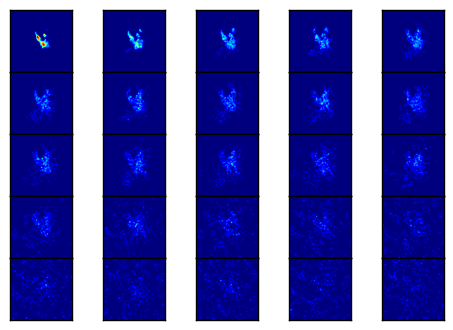

In [52]:
side=5
img_list,vmax=vertical_flux_decomposition(rep,side*side,orig.data.shape,mould,noise,delta)
show_decomposition_grid(img_list,side,vmax)

Threshold representation up to the 15th level and print it

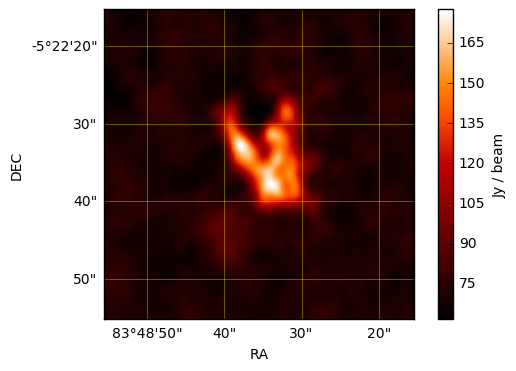

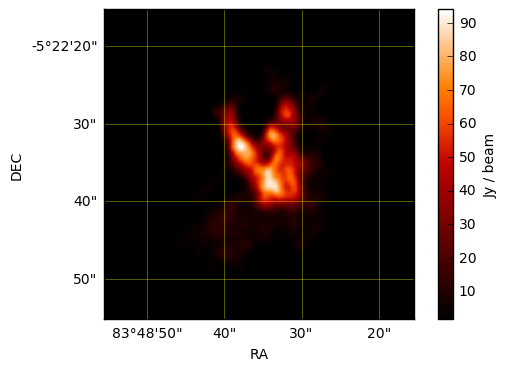

8430


In [53]:
limit  = 10*int(rep.shape[0]/(side*side))
th_rep = rep[0:limit]
synNew = np.zeros(orig.data.shape)
synthesize_bubbles(synNew,th_rep,mould,noise,delta)
#print(noise)
img    = synNew.sum(axis=(0))
plt.figure()
aca.visualize(orig2D.data*ym - yf,wcs=orig2D.wcs,unit=orig2D.unit)
plt.figure()
aca.visualize(img*ym-yf,wcs=orig2D.wcs,unit=orig2D.unit)
print(th_rep.size)

In [54]:
def show_clusters(labels,sol,start,stop,shape,template,mould,noise,delta):
    if start is None:
        start=0
    nclus=labels.max()+1
    if stop is None:
        stop=nclus+1
    print("Number of Clusters = "+str(nclus))
    fig=plt.figure(figsize=(5,4))
    
    gs = gridspec.GridSpec(2, 2, width_ratios=[shape[2]/shape[0], 1], height_ratios=[shape[1]/shape[0],1])
    
    tempXY=template.sum(axis=(0))
    #nax=fig.add_subplot(2,3,1)
    nax=plt.subplot(gs[0])
    nax.imshow(tempXY, origin='lower',cmap=plt.cm.gray)
    nax.get_xaxis().set_visible(False)
    nax.get_yaxis().set_visible(False)
 
    tempXZ=template.sum(axis=(1))
    #nax2=fig.add_subplot(2,3,4)
    nax2=plt.subplot(gs[2])
    nax2.imshow(tempXZ, origin='lower',cmap=plt.cm.gray)
    nax2.get_xaxis().set_visible(False)
    nax2.get_yaxis().set_visible(False)
   
    tempYZ=template.sum(axis=(2)).T
    #nax3=fig.add_subplot(2,3,2)
    nax3=plt.subplot(gs[1])
    nax3.imshow(tempYZ, origin='lower',cmap=plt.cm.gray)
    nax3.get_xaxis().set_visible(False)
    nax3.get_yaxis().set_visible(False)
    
    mmask=(labels>-1)
    labels=labels[mmask]
    sol=sol[mmask]
    bco=np.bincount(labels)
    bco=bco.argsort()[::-1][start:stop]
    color=plt.cm.rainbow(np.linspace(0,1,stop-start))
    
    i=0
    for b in bco:
        imask=(labels==b)
        npos  = sol[imask]
        newSyn=np.zeros(shape)
        newSyn=synthesize_bubbles(newSyn,npos,mould,noise,delta)
        nax.contour(newSyn.sum(axis=(0)),levels=[0.0],alpha=1.0,colors=[color[i]])
        nax2.contour(newSyn.sum(axis=(1)),levels=[0.0],alpha=1.0,colors=[color[i]])
        nax3.contour(newSyn.sum(axis=(2)).T,levels=[0.0],alpha=1.0,colors=[color[i]])
        i+=1
    plt.tight_layout()
    plt.show()
    plt.figure()
    
    #nax4=fig.add_subplot(1,3,3)
    nax4=plt.subplot(111)
    i=0
    for b in bco:
        imask=(labels==b)
        npos  = sol[imask]
        newSyn=np.zeros(shape)
        newSyn=synthesize_bubbles(newSyn,npos,mould,noise,delta)
        nax.contour(newSyn.sum(axis=(0)),levels=[0.0],alpha=1.0,colors=[color[i]])
        nax2.contour(newSyn.sum(axis=(1)),levels=[0.0],alpha=1.0,colors=[color[i]])
        nax3.contour(newSyn.sum(axis=(2)).T,levels=[0.0],alpha=1.0,colors=[color[i]])
        nax4.plot(newSyn.sum(axis=(1,2)),color=color[i])
        i+=1
    plt.tight_layout()
    plt.show()
    return(bco)

In [55]:
from sklearn.cluster import *
#clust=AffinityPropagation(damping=0.878).fit(th_rep)
#clust=MeanShift(bandwidth=).fit(th_rep)
clust=SpectralClustering(n_clusters=5,gamma=0.5).fit(th_rep)

Number of Clusters = 5


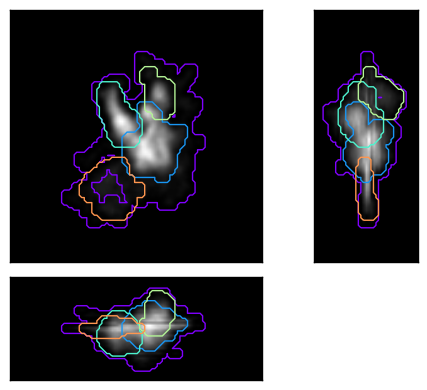

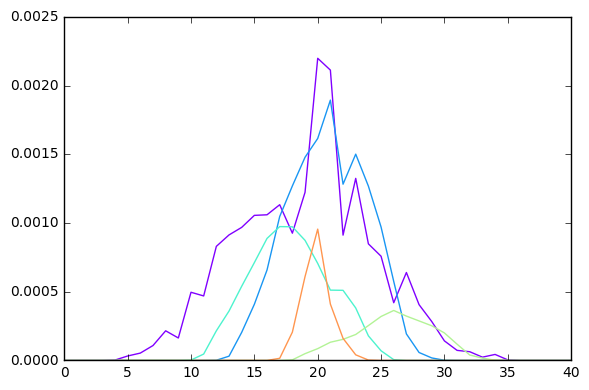

array([4, 1, 2, 3, 0])

In [56]:
show_clusters(clust.labels_,th_rep,None,None,orig.data.shape,synNew,mould,noise,delta)

## 5.2. TWHydra


In [57]:
ffile        = flist[1]
hdulist      = fits.open(DOWNLOADS_DIR+ffile[0])
orig         = aca.HDU_to_NDData(hdulist[0])
target       = ffile[1]
(orig,ym,yf) = aca.standarize(orig)
orig2D       = aca.moment0(orig)
noise        = snr_table['RMS'][0]
spa          = np.ceil((np.abs(orig.meta['BMIN']/orig.meta['CDELT1']) - 1)/2.0)
delta        = [1,spa,spa]
P            = precision_from_delta(delta,0.1)
mould        = create_mould(P,delta)
rep_t        = rep_list[1]
rep          = np.array([rep_t[c] for c in rep_t.columns])
rep          = rep.T

overwriting Masked Objects's current mask with specified mask.


INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


In [58]:
clust=MeanShift().fit(rep)
#imask=(clust.labels_==0)
#rep_fp=rep[imask]
#clust2=MeanShift().fit(rep_fp)

Number of Clusters = 19


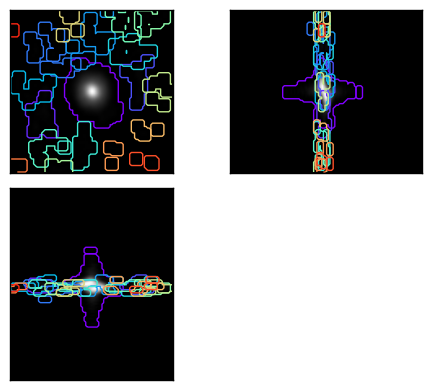

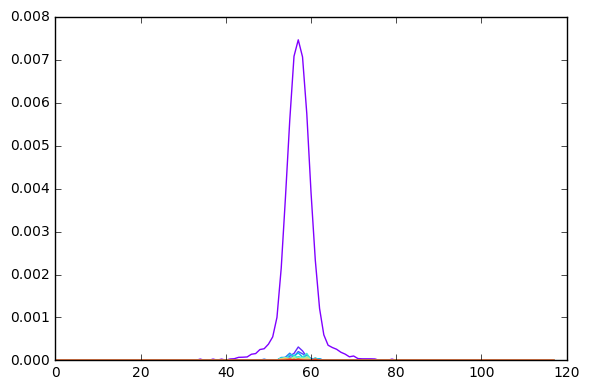

In [59]:
synNew = np.zeros(orig.data.shape)
synthesize_bubbles(synNew,rep,mould,noise,delta)
order=show_clusters(clust.labels_,rep,None,None,orig.data.shape,synNew,mould,noise,delta)

In [60]:
newRep=np.ndarray((0,3))
imask=(clust.labels_==order[0])
newRep=np.vstack((newRep,rep[imask]))

In [61]:
from mpl_toolkits.mplot3d import Axes3D

def show_manifold(sm):
    cbook=sm.codebook.matrix
    fig=plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(cbook[:,0],cbook[:,1], cbook[:,2])#, c=c, marker=m)
    for cb,dm_elm in zip(cbook,sm._distance_matrix):
        #print(cb)
        conn=(dm_elm==1).nonzero()
        #print(conn[0])
        for idx in conn[0]:
            #print(idx)
            ot=cbook[idx]
            #print(ot)
            ax.plot([cb[0],ot[0]],[cb[1],ot[1]],[cb[2],ot[2]],color = 'g')
    plt.show()

/home/mauricio/anaconda3/envs/astro3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


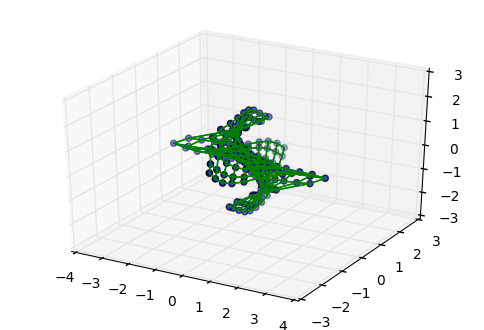

In [62]:
from sompy.sompy import SOMFactory
sm = SOMFactory().build(newRep, normalization = 'var', initialization='pca')
sm.train(n_job=1, verbose=False, train_rough_len=30, train_finetune_len=30)
show_manifold(sm)

## 5.3. M100


In [63]:
ffile        = flist[2]
hdulist      = fits.open(DOWNLOADS_DIR+ffile[0])
orig         = aca.HDU_to_NDData(hdulist[0])
target       = ffile[1]
(orig,ym,yf) = aca.standarize(orig)
orig2D       = aca.moment0(orig)
noise        = snr_table['RMS'][0]
spa          = np.ceil((np.abs(orig.meta['BMIN']/orig.meta['CDELT1']) - 1)/2.0)
delta        = [1,spa,spa]
P            = precision_from_delta(delta,0.1)
mould        = create_mould(P,delta)
rep_t        = rep_list[2]
rep          = np.array([rep_t[c] for c in rep_t.columns])
rep          = rep.T

/home/mauricio/anaconda3/envs/astro3.5/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
overwriting Masked Objects's current mask with specified mask.


INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


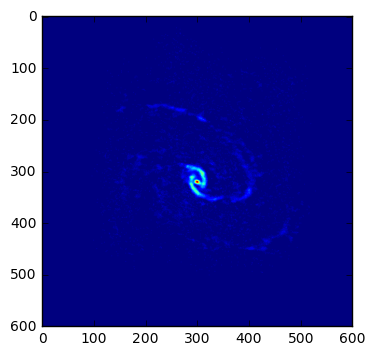

In [64]:
synNew = np.zeros(orig.data.shape)
synthesize_bubbles(synNew,rep,mould,noise,delta)
plt.figure()
plt.imshow(synNew.sum(axis=(0)))

Number of Clusters = 87


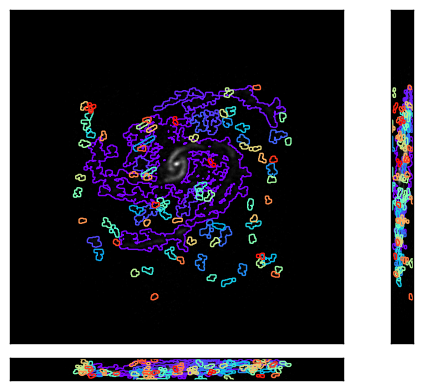

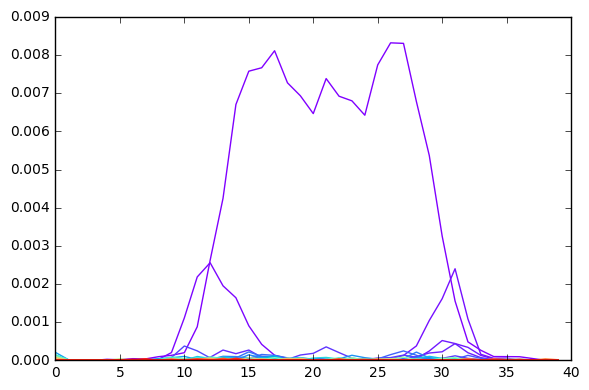

In [65]:
clust=DBSCAN(eps=7.0).fit(rep)
order=show_clusters(clust.labels_,rep,None,None,orig.data.shape,synNew,mould,noise,delta)

Number of Clusters = 87


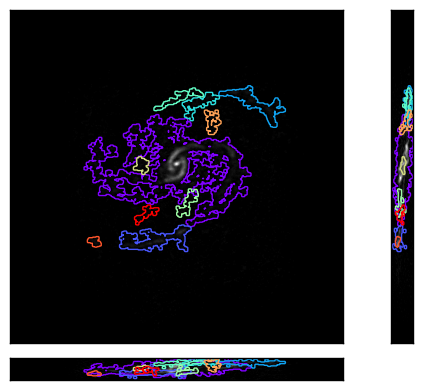

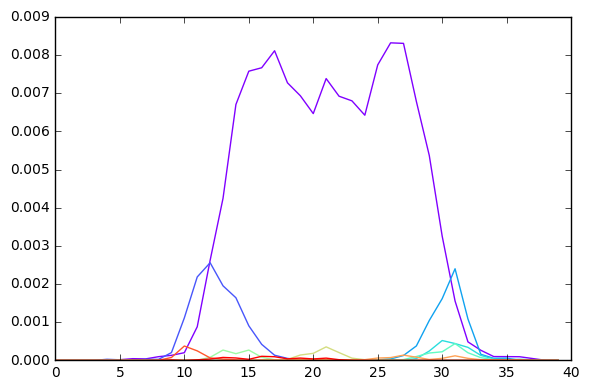

In [66]:
ccut=10
order=show_clusters(clust.labels_,rep,None,ccut,orig.data.shape,synNew,mould,noise,delta)
newRep=np.ndarray((0,3))
for i in range(ccut):
    imask=(clust.labels_==order[i])
    #print(newRep.shape,rep[imask].shape)
    newRep=np.vstack((newRep,rep[imask]))

Number of Clusters = 50


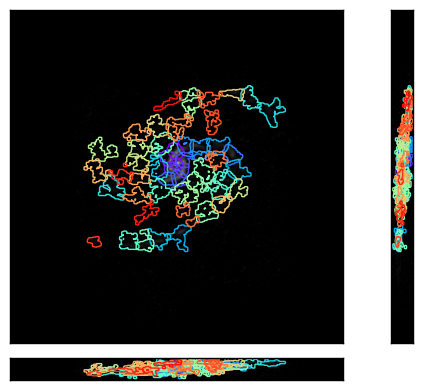

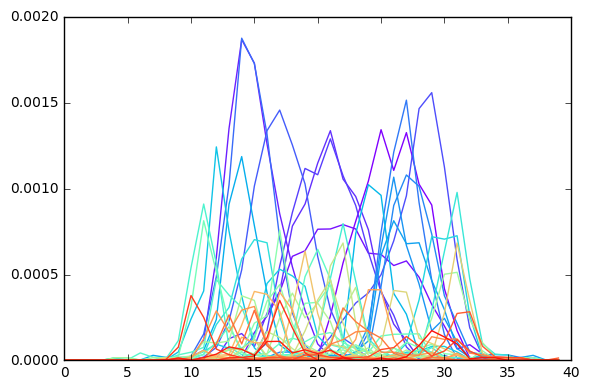

array([26, 34,  1, 24, 41, 10, 19, 16,  0,  4, 21, 30, 17, 28,  7, 46, 23,
       13,  3, 12, 18, 40, 39, 20, 36, 44, 35, 25, 31, 38,  5,  8, 22, 49,
       27, 32,  6, 47, 11, 45, 29, 43, 37, 48, 15, 42, 14, 33,  2,  9])

In [67]:
clust=KMeans(n_clusters=50).fit(newRep)
show_clusters(clust.labels_,newRep,None,None,orig.data.shape,synNew,mould,noise,delta)

In [68]:
def row_col_from_condensed_index(d,i):
    b = 1 -2*d 
    x = np.floor((-b - np.sqrt(b**2 - 8*i))/2)
    y = i + x*(b + x + 2)/2 + 1
    return (x,y)  

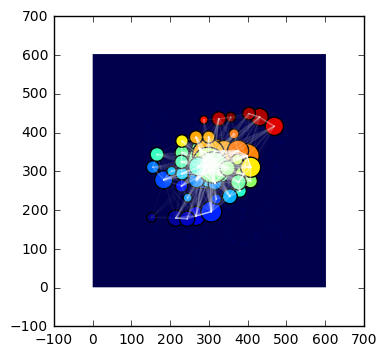

In [69]:
ss=np.bincount(clust.labels_)
ms=ss.max()
from scipy.spatial.distance import pdist,squareform
pps=clust.cluster_centers_
dds=pdist(pps)
dm=dds.max()
fig=plt.figure()
ax = fig.add_subplot(111)
ax.imshow(synNew.sum(axis=(0)),origin='lower',cmap='seismic')
ax.scatter(pps[:,2],pps[:,1],c=pps[:,0],s=ss)#, c=c, marker=m)
k=0
for con in dds:
    (i,j)=row_col_from_condensed_index(pps.shape[0],k)
    if i==j:
        continue
    cb=pps[i]
    ot=pps[j]
    d=con/dm
    mi=ss[i]/ms
    mj=ss[j]/ms
    metr=mi*mj/(d*d)*0.05
    ax.plot([cb[2],ot[2]],[cb[1],ot[1]], alpha = metr,color="w")
    k+=1

## 5.4. Antennae

In [70]:
ffile        = flist[3]
hdulist      = fits.open(DOWNLOADS_DIR+ffile[0])
orig         = aca.HDU_to_NDData(hdulist[0])
target       = ffile[1]
(orig,ym,yf) = aca.standarize(orig)
orig2D       = aca.moment0(orig)
noise        = snr_table['RMS'][0]
spa          = np.ceil((np.abs(orig.meta['BMIN']/orig.meta['CDELT1']) - 1)/2.0)
delta        = [1,spa,spa]
P            = precision_from_delta(delta,0.1)
mould        = create_mould(P,delta)
rep_t        = rep_list[3]
rep          = np.array([rep_t[c] for c in rep_t.columns])
rep          = rep.T

/home/mauricio/anaconda3/envs/astro3.5/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
overwriting Masked Objects's current mask with specified mask.


INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


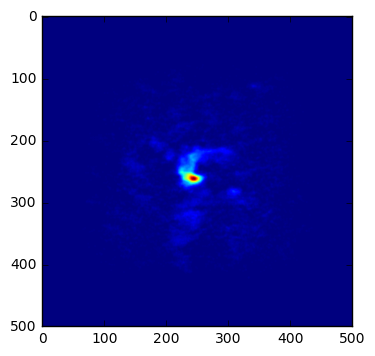

In [71]:
synNew = np.zeros(orig.data.shape)
synthesize_bubbles(synNew,rep,mould,noise,delta)
plt.figure()
plt.imshow(synNew.sum(axis=(0)))

Number of Clusters = 105


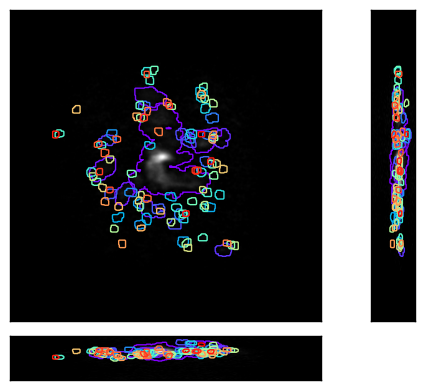

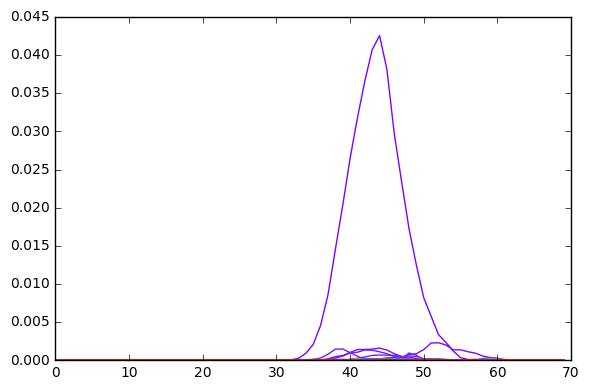

In [72]:
clust=DBSCAN(eps=3.0).fit(rep)
order=show_clusters(clust.labels_,rep,None,None,orig.data.shape,synNew,mould,noise,delta)

Number of Clusters = 105


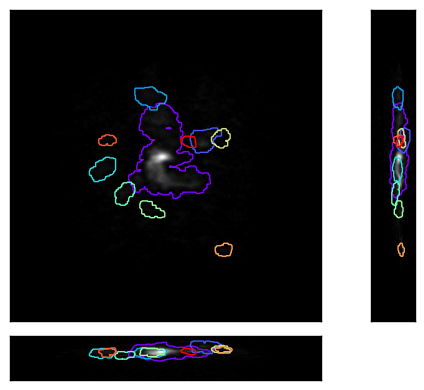

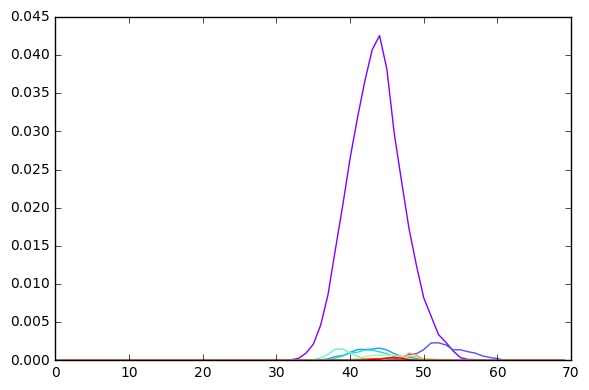

In [73]:
ccut=10
order=show_clusters(clust.labels_,rep,None,ccut,orig.data.shape,synNew,mould,noise,delta)
newRep=np.ndarray((0,3))
for i in range(ccut):
    imask=(clust.labels_==order[i])
    #print(newRep.shape,rep[imask].shape)
    newRep=np.vstack((newRep,rep[imask]))

Number of Clusters = 50


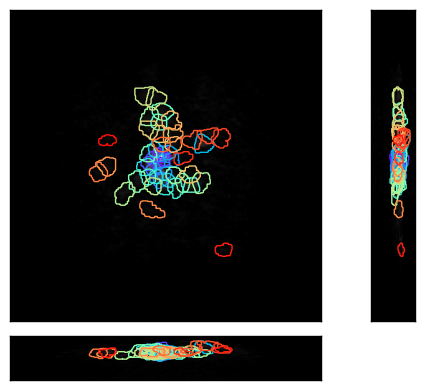

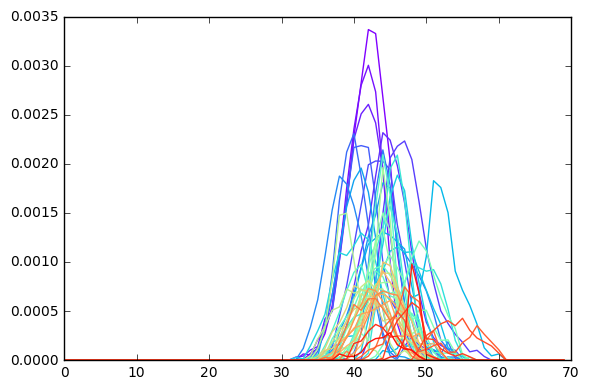

array([44, 46, 48, 34, 24, 18, 13,  1, 16, 47, 32, 37,  7, 25, 31, 27, 26,
       28, 41, 10, 38, 33, 36,  0, 40,  9, 39, 35, 17,  2, 11,  5, 12, 45,
       14, 30, 22, 21, 29,  6,  3, 15, 42, 23, 49,  4, 20, 43,  8, 19])

In [74]:
clust=KMeans(n_clusters=50).fit(newRep)
show_clusters(clust.labels_,newRep,None,None,orig.data.shape,synNew,mould,noise,delta)

In [75]:
def row_col_from_condensed_index(d,i):
    b = 1 -2*d 
    x = np.floor((-b - np.sqrt(b**2 - 8*i))/2)
    y = i + x*(b + x + 2)/2 + 1
    return (x,y)  

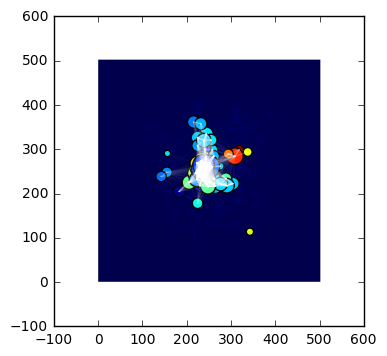

In [76]:
ss=np.bincount(clust.labels_)
ms=ss.max()
from scipy.spatial.distance import pdist,squareform
pps=clust.cluster_centers_
dds=pdist(pps)
dm=dds.max()
fig=plt.figure()
ax = fig.add_subplot(111)
ax.imshow(synNew.sum(axis=(0)),origin='lower',cmap='seismic')
k=0
for con in dds:
    (i,j)=row_col_from_condensed_index(pps.shape[0],k)
    if i==j:
        continue
    cb=pps[i]
    ot=pps[j]
    d=con/dm
    mi=ss[i]/ms
    mj=ss[j]/ms
    metr=mi*mj/(d*d)*0.02
    ax.plot([cb[2],ot[2]],[cb[1],ot[1]], alpha = metr,color="w")
    k+=1
ax.scatter(pps[:,2],pps[:,1],c=pps[:,0],s=ss/2.0)#, c=c, marker=m)

## 5.5. IRAS

In [77]:
ffile        = flist[4]
hdulist      = fits.open(DOWNLOADS_DIR+ffile[0])
orig         = aca.HDU_to_NDData(hdulist[0])
target       = ffile[1]
(orig,ym,yf) = aca.standarize(orig)
orig2D       = aca.moment0(orig)
noise        = snr_table['RMS'][0]
spa          = np.ceil((np.abs(orig.meta['BMIN']/orig.meta['CDELT1']) - 1)/2.0)
delta        = [1,spa,spa]
P            = precision_from_delta(delta,0.1)
mould        = create_mould(P,delta)
rep_t        = rep_list[4]
rep          = np.array([rep_t[c] for c in rep_t.columns])
rep          = rep.T

/home/mauricio/anaconda3/envs/astro3.5/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
overwriting Masked Objects's current mask with specified mask.


INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


In [78]:
def show_clusters2(labels,sol,start,stop,shape,template,mould,noise,delta):
    if start is None:
        start=0
    nclus=labels.max()+1
    if stop is None:
        stop=nclus+1
    print("Number of Clusters = "+str(nclus))
    fig=plt.figure(figsize=(5,4))
    
    gs = gridspec.GridSpec(2, 2, width_ratios=[shape[2]/shape[0], 1], height_ratios=[shape[1]/shape[0],1])
    
    tempXY=template.sum(axis=(0))
    #nax=fig.add_subplot(2,3,1)
    nax=plt.subplot(gs[0])
    nax.imshow(tempXY, origin='lower',cmap=plt.cm.gray)
    nax.get_xaxis().set_visible(False)
    nax.get_yaxis().set_visible(False)
 
    tempXZ=template.sum(axis=(1))
    #nax2=fig.add_subplot(2,3,4)
    nax2=plt.subplot(gs[2])
    nax2.imshow(tempXZ, origin='lower',cmap=plt.cm.gray)
    nax2.get_xaxis().set_visible(False)
    nax2.get_yaxis().set_visible(False)
   
    tempYZ=template.sum(axis=(2)).T
    #nax3=fig.add_subplot(2,3,2)
    nax3=plt.subplot(gs[1])
    nax3.imshow(tempYZ, origin='lower',cmap=plt.cm.gray)
    nax3.get_xaxis().set_visible(False)
    nax3.get_yaxis().set_visible(False)
    
    mmask=(labels>-1)
    labels=labels[mmask]
    sol=sol[mmask]
    bco=np.bincount(labels)
    bco=bco.argsort()[::-1][start:stop]
    color=plt.cm.rainbow(np.linspace(0,1,stop-start))
    
    nax4=plt.subplot(gs[3])
    
    i=0
    for b in bco:
        imask=(labels==b)
        npos  = sol[imask]
        newSyn=np.zeros(shape)
        newSyn=synthesize_bubbles(newSyn,npos,mould,noise,delta)
        nax.contour(newSyn.sum(axis=(0)),levels=[0.0],alpha=1.0,colors=[color[i]])
        nax2.contour(newSyn.sum(axis=(1)),levels=[0.0],alpha=1.0,colors=[color[i]])
        nax3.contour(newSyn.sum(axis=(2)).T,levels=[0.0],alpha=1.0,colors=[color[i]])
        nax4.plot(newSyn.sum(axis=(1,2)),color=color[i])
        i+=1
    plt.tight_layout()
    plt.show()
    return(bco)

Number of Clusters = 69


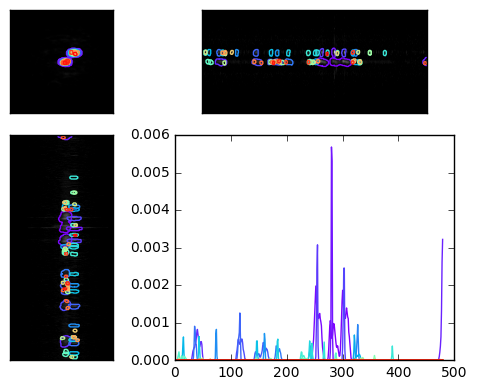

In [79]:
synNew = np.zeros(orig.data.shape)
synthesize_bubbles(synNew,rep,mould,noise,delta)
clust=DBSCAN(eps=1.5).fit(rep)
order=show_clusters2(clust.labels_,rep,None,None,orig.data.shape,synNew,mould,noise,delta)

In [80]:
db_rep=rep[clust.labels_!=-1]
print(rep.shape)
print(db_rep.shape)

(34511, 3)
(8596, 3)


Number of Clusters = 100


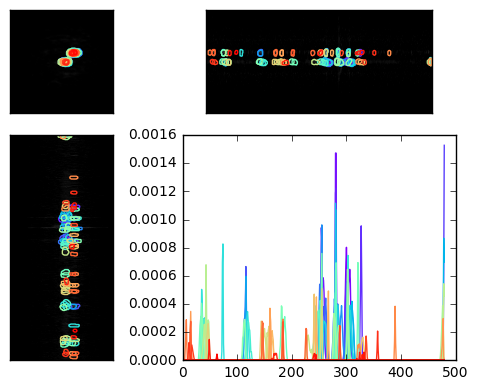

In [81]:
from sklearn.mixture import GaussianMixture
from astropy import units as u
ncomp=100
model=GaussianMixture(n_components=ncomp).fit(db_rep)
labels=model.predict(db_rep)
order=show_clusters2(labels,db_rep,None,None,orig.data.shape,synNew,mould,noise,delta)


In [82]:
def compute_gclumps_parameters(rep,P,cid):
    fwhm_c=np.sqrt(8*np.log(2))
    mu=rep.mean(axis=(0))
    vec=(mu - rep)
    c=rep.size
    Sigma=np.linalg.inv(P)+np.dot(vec.T,vec)/c
    A=np.linalg.inv(Sigma)
    dv=np.sqrt(1./A[0,0])
    ga=-A[2,0]/A[0,0]
    gd=-A[1,0]/A[0,0]
    b0=A[1,1]-(gd*gd)/(dv*dv)
    b1=A[1,2]-(ga*gd)/(dv*dv)
    b2=A[2,2]-(ga*ga)/(dv*dv)
    B=np.linalg.inv(np.array([[b0,b1],[b1,b2]]))
    (U,S,V)=np.linalg.svd(B)
    de=np.sqrt(S)
    return(cid,c,mu[2],mu[1],mu[0],fwhm_c*de[1],fwhm_c*de[0],(np.arcsin(-U[0,0])*u.rad).to("deg").value,fwhm_c*dv,gd,ga)

In [83]:
gclu=Table(names=('CLUST ID',
                  'N', 
                  'RA',
                  'DEC',
                  'FREQ',
                  'SEMIAXIS 1',
                  'SEMIAXIS 2',
                  'ANGLE',
                  'LINE FWHM',
                  'GRAD RA/FREQ',
                  'GRAD DEC/FREQ'))

for i in order:
    imask=(labels==i)
    rep_gm=db_rep[imask]
    gclu.add_row(vals=compute_gclumps_parameters(rep_gm,P,i))
gclu

CLUST ID,N,RA,DEC,FREQ,SEMIAXIS 1,SEMIAXIS 2,ANGLE,LINE FWHM,GRAD RA/FREQ,GRAD DEC/FREQ
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
26.0,633.0,117.502369668,109.3507109,299.388625592,3.09043499522,3.64684225783,72.5894540607,2.52876653164,0.0372783698127,-0.0333519059397
53.0,585.0,119.138461538,107.969230769,305.512820513,3.12784871874,3.48488610126,67.8978965288,2.58958778672,0.0562537079322,-0.0231694107581
6.0,570.0,133.4,126.421052632,280.5,3.18636414967,3.52667382504,63.4072111488,1.28768893678,0.0230575762722,-0.0148230272025
0.0,516.0,119.186046512,108.058139535,257.581395349,2.98593972007,3.61521975012,41.535831272,2.46196758538,0.0315944823383,-0.086541382556
67.0,483.0,138.51552795,129.757763975,280.472049689,3.02036273307,3.50198436634,18.1246114252,1.31945162334,0.0332787780433,-0.0628641303351
66.0,471.0,111.356687898,109.133757962,299.566878981,3.23182611295,3.54805744569,-20.4051980273,2.60930979899,0.0665115986787,-0.174479907012
8.0,447.0,135.932885906,127.859060403,326.738255034,3.24587302043,5.7837855019,-3.53204173295,1.71471571106,0.054808708008,-0.0125830433245
28.0,423.0,137.503546099,128.163120567,254.191489362,3.00024621332,3.78470084426,89.7768106012,1.5249774459,0.0161023642349,-0.000830508101159
84.0,417.0,114.776978417,109.007194245,478.755395683,3.27772725447,3.98394164885,61.7546182188,1.24009573583,0.00489184726571,0.0259466351507


In [84]:
ttab=gclu[gclu['LINE FWHM']>3]
# Generating the latex table for the paper
from astropy.io import ascii
ascii.write(ttab,format='latex')

\begin{table}
\begin{tabular}{ccccccccccc}
CLUST ID & N & RA & DEC & FREQ & SEMIAXIS 1 & SEMIAXIS 2 & ANGLE & LINE FWHM & GRAD RA/FREQ & GRAD DEC/FREQ \\
92.0 & 411.0 & 123.255474453 & 108.255474453 & 251.737226277 & 2.92657487446 & 3.4049066777 & -39.3479568679 & 3.46641241196 & -0.0131131565257 & 0.215383427997 \\
52.0 & 402.0 & 113.686567164 & 106.552238806 & 259.059701493 & 2.94030362379 & 3.43133358439 & 30.8253630774 & 3.07383435506 & -0.0228673479962 & 0.127486234823 \\
3.0 & 336.0 & 117.642857143 & 107.5625 & 40.3035714286 & 2.90119276479 & 3.36708426867 & 84.6259725825 & 3.00027036545 & 0.0235029962528 & 0.228233280908 \\
60.0 & 315.0 & 124.628571429 & 107.485714286 & 259.980952381 & 2.79220491627 & 3.39064551507 & 36.0953222024 & 3.03853570699 & -0.0364943040273 & -0.117896978928 \\
12.0 & 294.0 & 119.795918367 & 108.857142857 & 114.255102041 & 2.95574739032 & 3.32299188094 & -27.5580557645 & 3.08841500819 & 0.00777357416824 & 0.0352455432657 \\
83.0 & 291.0 & 121.989690722 &

946
(946, 3)
Number of Clusters = 11


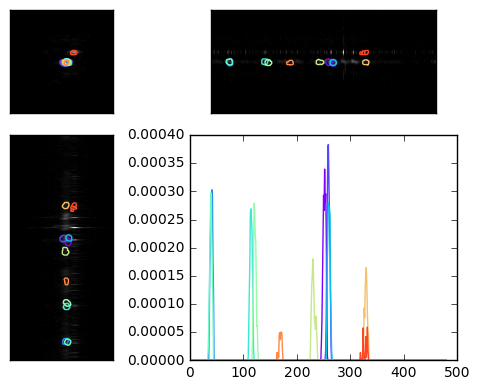

In [85]:
elms=gclu[gclu['LINE FWHM']>3]['CLUST ID']
newRep=np.ndarray((0,3))
newLab=[]
count=0
for j in elms:
    imask=(labels==j)
    current=db_rep[imask]
    newRep=np.vstack((newRep,current))
    newLab.extend([count]*int(current.shape[0]))
    count+=1
print(len(newLab))
print(newRep.shape)
order=show_clusters2(np.array(newLab),newRep,None,None,orig.data.shape,synNew,mould,noise,delta)